# Numerical Derivatives Group Project 
#### Corey Dobbs and Emma Rasmussen 

## Problem 1- Finite Differences

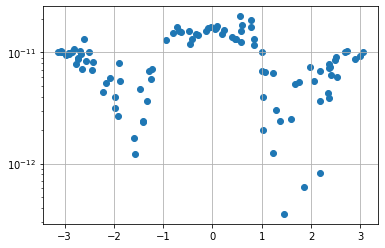

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
h = 10**(-5)

random_x = [random.uniform(-np.pi, np.pi) for _ in range(100)]
all_errors = []
for x in random_x:
    approx = (np.sin( x + h ) - np.sin( x - h )) / (2 * h)
    error = np.abs(approx - np.cos( x ))
    all_errors.append( error )

plt.scatter(random_x,all_errors)
plt.yscale('log')
plt.grid()
plt.show()

Now, to optimize h, we will just test out a bunch of h's and see which one seems optimal.

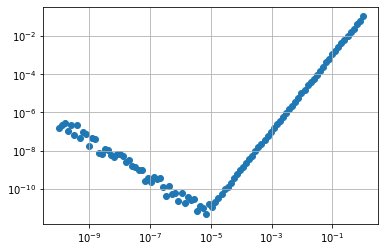

In [2]:
h_vals = np.logspace(-10, 0, num=100)
all_errors = []

for h in h_vals:
    x = np.array([random.uniform(-np.pi, np.pi) for _ in range(100)])
    approx = (np.sin( x + h ) - np.sin( x - h )) / (2 * h)
    error = np.abs(approx - np.cos( x ))
    meanerr = np.mean(error)
    all_errors.append( meanerr )

plt.scatter(h_vals,all_errors)
plt.yscale('log')
plt.xscale('log')
plt.grid()
plt.show()

By looking at the graph, we can see that the error seems to level off at about h = 10^5, so we can estimate an optimal h value of about h = $10^{-5}$. This h value has already been inserted into the error plot above, and one can see that the magnitude of the error doesn't get much above a magnitude of $10^{-11}$.

## Problem 2- More Sophisticated Derivatives

### Part a 

We deicided to do the Automatic and Chebyshev methods (called Dual and Chebyshev in driver)

In [1]:
%pip install git+https://github.com/chebpy/chebpy.git
%pip install autograd

  Cloning https://github.com/chebpy/chebpy.git to /tmp/pip-req-build-h6i5jk2b
  Running command git clone -q https://github.com/chebpy/chebpy.git /tmp/pip-req-build-h6i5jk2b
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for chebpy: filename=chebpy-0.4.3.3-py3-none-any.whl size=54630 sha256=88b36988c42cfe6a9e025481043c7f6c8ea22539b18470660c03c055abc7d3cf
  Stored in directory: /tmp/pip-ephem-wheel-cache-lq1nerw3/wheels/31/6e/ce/d3a09a38c5c744791620e0fcaef3ea23b8d9c6712f3ea17fb2
Successfully built chebpy
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [11]:
import numpy as np
import matplotlib.pyplot as plt
import chebpy as cheb

def rmse(predictions, targets):
    return np.sqrt(((np.array(predictions) - np.array(targets)) ** 2).mean())

def func(x):
    return 3*x**2 + 1/np.pi**2 * np.log((np.pi-x)**2) + 1

def func(x):
    return 3*x**2 + 1/np.pi**2 * np.log((np.pi-x)**2) + 1

def func_sin100(x):
    for _ in range(100):
        x = np.sin(x)
    return x

def chebyshev( function, interval, N=100 ):
    f = cheb.chebfun( function, interval, n=N )
    plt.figure()
    derivative = f.diff()
    derivative.plot(label='Chebyshev')
    plt.grid()
    return derivative

In [12]:
import matplotlib.pyplot as plt
import autograd.numpy as anp
from autograd import grad

def dual(fun, interval, N=100):
    x = np.linspace(interval[0], interval[1], N)
    deriv  = grad(fun) # Obtain gradient function
    plt.figure()
    plt.plot(x, list(map(deriv, x)), label='Automatic diff.')
    plt.grid()
    return deriv

In [13]:
import time
def driver( method, function, interval, analytical, N=100 ):
    if method=='chebyshev':
        start = time.time()
        derivative = chebyshev( function, interval, N )
        end = time.time()
    elif method=='dual':
        start = time.time()
        derivative = dual( function, interval, N )
        end = time.time()
    else:
        print('Please choose a method \'chebyshev\' or \'dual\'')
    total_time = end - start
    x = np.linspace(interval[0],interval[1],N)
    plt.plot(x, analytical(x), label='analytical derivative', linestyle='dashed')
    plt.legend()
    # plt.ylim([-3,3])
    if method=='chebyshev':
        RMSE = rmse(derivative(x), analytical(x))
    elif method=='dual':
        RMSE = None
    print(f'For method {method}, function{function}:')
    print(f'The total time it took was {total_time}')
    print(f'The RMSE was {RMSE}')
    print(f'The derivative graph is below:')
    plt.show()

In [5]:
import numpy as np

def func1(x):
    return anp.sin(x)

def func2(x):
    return anp.sin(1/x)

def func3(x):
    return 3*x**2 + 1/anp.pi**2*anp.log((anp.pi-x)**2) + 1

def func4(x):
    for _ in range(100):
        x = anp.sin(x)
    return x

def func5_cheb(x):
    y = anp.zeros(anp.shape(x))
    for idx, x_val in enumerate(x):
        A = anp.array([[1,x_val],[2,x_val**2]])
        b = anp.array([1,1])
        y_vec = anp.linalg.solve(A,b)
        y[idx] = 1/anp.linalg.norm(y_vec,2)
    print(1/anp.linalg.norm(y))
    return y

def func5_dual(x):
    A = anp.array([[1,x],[2,x**2]])
    b = anp.array([1,1])
    y = anp.linalg.solve(A,b)
    normy = anp.linalg.norm(y)
    return 1/normy

In [6]:
def func1p(x):
    return np.cos(x)

def func2p(x):
    return -x**-2 * np.cos(1/x)

def func3p(x):
    return 6*x - 2/(np.pi-x)

def func4p(x):
    cos = np.cos
    sin = np.sin
    deriv = cos(x)
    for i in range(100):
        new_term = x
        for _ in range(i):
            new_term = sin(new_term)        
        deriv *= cos(new_term)
    return deriv

def func5p(x):
    y = ((-2+2*x-x**3+x**4)*(1+x))/((2)*(x**3)*((x-2)**3)*((1+x**2-2*x**3+x**4)/((-2+x)**2*(x**2)))**(3/2))
    return y


For method chebyshev, function<function func1 at 0x7fe86ecac0d0>:
The total time it took was 0.013921737670898438
The RMSE was 3.280816358084691e-14
The derivative graph is below:


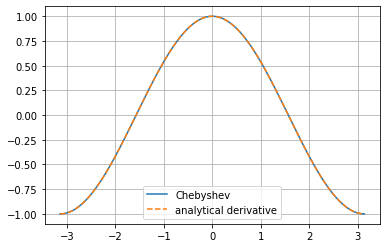

For method chebyshev, function<function func2 at 0x7fe86ecac160>:
The total time it took was 0.011479377746582031
The RMSE was 65.61227133106867
The derivative graph is below:


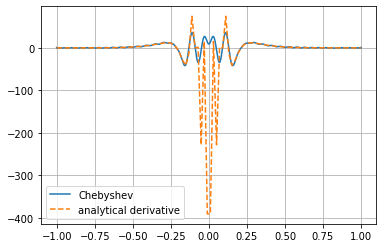

For method chebyshev, function<function func3 at 0x7fe86ecac1f0>:
The total time it took was 0.010745763778686523
The RMSE was 2821.3235193439427
The derivative graph is below:


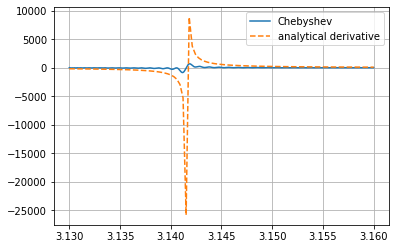

For method chebyshev, function<function func4 at 0x7fe86ecac280>:
The total time it took was 0.011230230331420898
The RMSE was 0.0037355107444599247
The derivative graph is below:


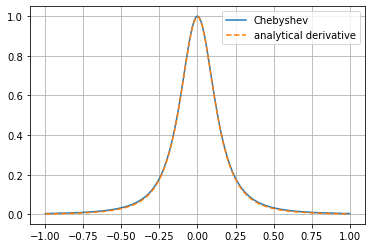

0.10513418326107192
For method chebyshev, function<function func5_cheb at 0x7fe86ecac310>:
The total time it took was 0.018210887908935547
The RMSE was 0.4783628582884836
The derivative graph is below:


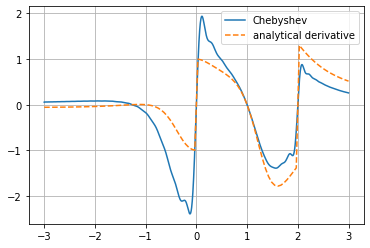

In [14]:
pi = np.pi

driver('chebyshev', func1, [-pi,pi], func1p)
driver('chebyshev', func2, [-1,1], func2p)
driver('chebyshev', func3, [3.13,3.16], func3p)
driver('chebyshev', func4, [-1,1], func4p)
driver('chebyshev', func5_cheb, [-3,3], func5p)

TypeError: Grad only applies to real scalar-output functions. Try jacobian, elementwise_grad or holomorphic_grad.

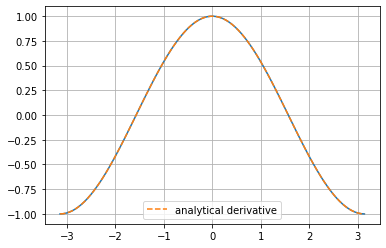

In [10]:
driver('dual', func1, [-pi,pi], func1p)
driver('dual', func2, [-1,1], func2p)
driver('dual', func3, [3.13,3.16], func3p)
driver('dual', func4, [-1,1], func4p)
driver('dual', func5_dual, [-3,3], func5p)